In [36]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
# magic word for producing visualizations in notebook
%matplotlib inline

# show all observation-related columns/rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
from where_is import WhereIs

In [37]:
where_is = WhereIs(False)

In [38]:
all_paths = where_is.get_paths_list

In [39]:
customers = pd.read_csv(all_paths[1], sep=';')

/home/jair/.cache/pypoetry/virtualenvs/arvatocapstoneproject-L5ipTb8G-py3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
df_info_columns = pd.read_excel(all_paths[5])

In [41]:
#Set NaNs
cod_nan = pd.read_csv(all_paths[2])

## Working on AzDias

In [42]:
azdias = pd.read_csv(all_paths[0], sep=';')

In [43]:
azdias_exp = azdias


In [44]:
columns_to_drop = {'D19_LETZTER_KAUF_BRANCHE':'Other columns name, no descriptions', 'EINGEFUEGT_AM': 'No information about, data as input', 'LNR': 'Client Number'}

In [45]:
#Drop bad columns
azdias.drop(columns_to_drop.keys(), axis=1, inplace=True)
customers.drop(columns_to_drop.keys(), axis=1, inplace=True)

In [46]:
#Set Nans on invalid values
cod_nan.drop(cod_nan.columns[0], axis=1, inplace=True)

In [47]:
#Set attribute as NaN
cod_nan.set_index('Attribute', inplace=True)

In [48]:
cod_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, AGER_TYP to ZABEOTYP
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   254 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [49]:
dict_to_nan = cod_nan.to_dict()['Value']

In [50]:
%%time
##Check for categorical values
for key, value in dict_to_nan.items():
    if len(value)> 2:
        dict_to_nan[key] = [int(num) for num in value.split(',')]
    else:
        dict_to_nan[key] = int(value)

CPU times: user 171 µs, sys: 39 µs, total: 210 µs
Wall time: 214 µs


In [51]:
dict_to_nan['CAMEO_DEUG_2015'] = [-1,'X']
dict_to_nan['CAMEO_DEU_2015'] = [-1,'XX']
dict_to_nan['CAMEO_INTL_2015'] = [-1,'XX']


In [52]:
#Drop BIG FLAG column that doenst exist on any dataframe, but it is on column info dataframe
bip_flag = dict_to_nan.pop('BIP_FLAG')

In [53]:
#tHIS COLUMN not exist on azdias or even on customers so i droped, but the column information is equal to cameo_intl_2015
cameo_intl = dict_to_nan.pop('CAMEO_DEUINTL_2015')

In [54]:
azdias_cols = azdias.columns
customers_cols = customers.columns
columns_not_in = {'azdias':[], 'customers':[]}
for key, value, in dict_to_nan.items():
    if key in azdias_cols:
        azdias[key] = azdias[key].replace(value, np.nan)
        print(f'Porcentagem de nan pos replace {azdias[key].isnull().mean()}')
    else:
        columns_not_in['azdias'].append(key)
    if key in customers_cols:
        customers[key] = customers[key].replace(value, np.nan)
    else:
        columns_not_in['customers'].append(key)

Porcentagem de nan pos replace 0.7601964047076988
Porcentagem de nan pos replace 0.0
Porcentagem de nan pos replace 0.0
Porcentagem de nan pos replace 0.10518154307405234
Porcentagem de nan pos replace 0.11147852216229195
Porcentagem de nan pos replace 0.005446460529992
Porcentagem de nan pos replace 0.9332522460758892
Porcentagem de nan pos replace 0.8910247850981967
Porcentagem de nan pos replace 0.7611254671961276
Porcentagem de nan pos replace 0.9779112027207617
Porcentagem de nan pos replace 0.815714620728192
Porcentagem de nan pos replace 0.656175067688037
Porcentagem de nan pos replace 0.5669783364619999
Porcentagem de nan pos replace 0.39739862503239937
Porcentagem de nan pos replace 0.626733436487695
Porcentagem de nan pos replace 0.5060417113151507
Porcentagem de nan pos replace 0.9627129522307037
Porcentagem de nan pos replace 0.9270517638161578
Porcentagem de nan pos replace 0.9190918975203681
Porcentagem de nan pos replace 0.9907957734389113
Porcentagem de nan pos replace 

In [62]:
azdias['CAMEO_INTL_2015'].unique()

array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45'],
      dtype=object)

In [63]:
azdias['CAMEO_INTL_2015'].isnull().mean()

0.11147852216229195

In [64]:
azdias['CAMEO_INTL_2015'].value_counts(dropna=False)


NaN     99352
51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
Name: CAMEO_INTL_2015, dtype: int64

In [65]:
#number of missing values by each column in azdias dataset
col_nul_percent=azdias.isnull().sum()/azdias.shape[0]


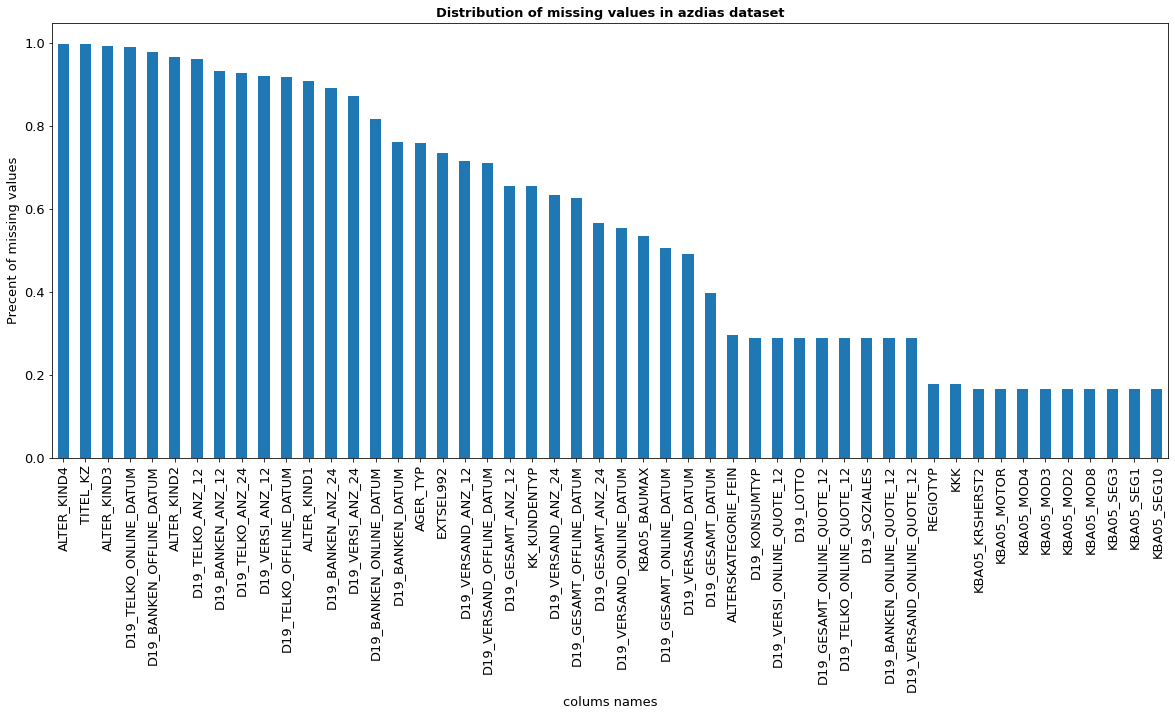

In [66]:
plt.title("Distribution of missing values in azdias dataset",fontsize=13,fontweight="bold")
plt.xlabel("colums names",fontsize=13)
plt.ylabel("Precent of missing values",fontsize=13)
(col_nul_percent.sort_values(ascending=False)[:50].plot(kind='bar', figsize=(20,8), fontsize=13));


Text(0, 0.5, 'count')

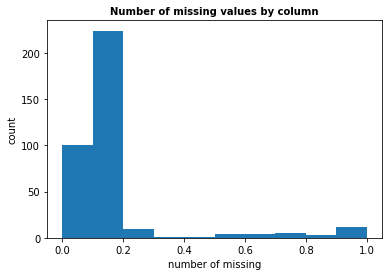

In [67]:

plt.hist(col_nul_percent)
plt.title("Number of missing values by column",fontsize=10,fontweight="bold")
plt.xlabel("number of missing",fontsize=10)
plt.ylabel("count",fontsize=10)

In [68]:
### Drop Columns from costumers, that columns are specific
customers.drop(['PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'], axis=1,inplace=True)

KeyError: "['PRODUCT_GROUP' 'CUSTOMER_GROUP' 'ONLINE_PURCHASE'] not found in axis"

In [69]:
#Distribution of missing values by rows:-
row_nul_percent=azdias.isnull().sum(axis=1)

Text(0, 0.5, 'count')

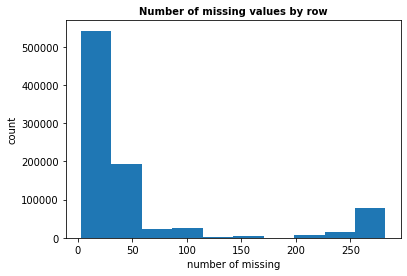

In [70]:
plt.hist(row_nul_percent)
plt.title("Number of missing values by row",fontsize=10,fontweight="bold")
plt.xlabel("number of missing",fontsize=10)
plt.ylabel("count",fontsize=10)


In [71]:
#droping columns that have more than 20% of missing values
column_nans = azdias.isnull().mean()
drop_cols = azdias.columns[column_nans > 0.20]
print('columns to drop: ', drop_cols)

columns to drop:  Index(['AGER_TYP', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4',
       'ALTERSKATEGORIE_FEIN', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24',
       'D19_BANKEN_DATUM', 'D19_BANKEN_OFFLINE_DATUM',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12',
       'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM',
       'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM',
       'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_LOTTO',
       'D19_SOZIALES', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24',
       'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM',
       'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24',
       'D19_VERSAND_DATUM', 'D19_VERSAND_OFFLINE_DATUM',
       'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12',
       'D19_VERSI_ANZ_12', 'D19_VERSI_ANZ_24', 'D19_VERSI_ONLINE_QUOTE_12',
       'EXTSEL992', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'TITEL_KZ'],
      dtype='object')


In [72]:
azdias.drop(drop_cols, axis=1, inplace=True)

In [73]:
customers.drop(drop_cols, axis=1, inplace=True)

In [74]:
##Working on wohnlage remove 0 as no socre calculate, change by nan
azdias['WOHNLAGE'].replace(0,np.nan)

0         NaN
1         4.0
2         2.0
3         7.0
4         3.0
         ... 
891216    3.0
891217    5.0
891218    7.0
891219    5.0
891220    4.0
Name: WOHNLAGE, Length: 891221, dtype: float64

In [75]:
##Working on OST
azdias['OST_WEST_KZ'].replace(['O','W'], [0, 1], inplace=True)
customers['OST_WEST_KZ'].replace(['O','W'], [0, 1], inplace=True)

In [76]:
azdias['CAMEO_INTL_2015'].unique()

array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45'],
      dtype=object)

In [87]:
##Working on CAMEO_INTL_2015
values_list_azdias = list(azdias['CAMEO_INTL_2015'].values)
values_list_customers = list(customers['CAMEO_INTL_2015'].values)

In [84]:
azdias['WEALTH'] = [value if pd.isnull(value) else int(str(value)[0]) for value in values_list_azdias]

In [85]:
azdias['LIFE_AGE'] = [value if pd.isnull(value) else int(str(value)[1]) for value in values_list_azdias]

In [88]:
customers['WEALTH'] = [value if pd.isnull(value) else int(str(value)[0]) for value in values_list_customers]

In [89]:
customers['LIFE_AGE'] = [value if pd.isnull(value) else int(str(value)[1]) for value in values_list_customers]

In [ ]:
azdias.drop(['CAMEO_DEUG_2015'], axis=1, inplace=True)

In [34]:
customers.drop(['CAMEO_DEUG_2015'], axis=1, inplace=True)

NameError: name 'customers' is not defined

In [35]:
col_cus = customers.columns
print(col_cus[10:50])

NameError: name 'customers' is not defined

In [98]:
azdias['PLZ8_BAUMAX_FAMILY'] = np.where(azdias['PLZ8_BAUMAX']==5, 0, azdias['PLZ8_BAUMAX'])
azdias['PLZ8_BAUMAX_bussiness'] = np.where(azdias['PLZ8_BAUMAX']==5, 1, np.where(azdias['PLZ8_BAUMAX'].isnull(),azdias['PLZ8_BAUMAX'], 0))

In [104]:
azdias['PLZ8_BAUMAX_bussiness'].value_counts()


0.0    677373
1.0     97333
Name: PLZ8_BAUMAX_bussiness, dtype: int64

In [39]:
df_train = pd.read_csv(all_paths[4], sep=';')

# TODO: TRANSFORMAR TUDO ISTO EM UMA FUNÇÃO DE LIMPEZA


/home/jair/.cache/pypoetry/virtualenvs/arvatocapstoneproject-L5ipTb8G-py3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
